In [20]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [21]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [55]:
data=[]
paths=[]
results=[]

for r,d,f in os.walk(r'C:\Users\91902\Desktop\keras\DM project\brain_tumor_dataset1\yes'):
    for file in f:
        paths.append(os.path.join(r,file))
   
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        results.append(encoder.transform([[0]]).toarray())

In [56]:
len(results)

138

In [57]:
len(data)

138

In [58]:
paths = []
for r, d, f in os.walk(r"C:\Users\91902\Desktop\keras\DM project\brain_tumor_dataset1\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        results.append(encoder.transform([[1]]).toarray())

In [59]:
len(results)

207

In [60]:
data=np.array(data)
data.shape

(207, 128, 128, 3)

In [61]:
result=np.array(results)
result.shape

(207, 1, 2)

In [62]:
result[0]

array([[1., 0.]])

In [63]:
result=result.reshape(207,2)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.2,shuffle=True)

In [65]:
model = keras.Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)       

In [66]:
history=model.fit(x_train,y_train,epochs=30,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
6/6 [==============================] - 5s 902ms/step - loss: 33.0494 - val_loss: 74.2280
Epoch 2/30
6/6 [==============================] - 5s 788ms/step - loss: 9.9111 - val_loss: 14.2882
Epoch 3/30
6/6 [==============================] - 5s 790ms/step - loss: 4.2112 - val_loss: 4.4325
Epoch 4/30
6/6 [==============================] - ETA: 0s - loss: 1.876 - 5s 808ms/step - loss: 1.8766 - val_loss: 3.4257
Epoch 5/30
6/6 [==============================] - 5s 802ms/step - loss: 0.5905 - val_loss: 3.6149
Epoch 6/30
6/6 [==============================] - 5s 788ms/step - loss: 1.1496 - val_loss: 2.9456
Epoch 7/30
6/6 [==============================] - 5s 777ms/step - loss: 1.5753 - val_loss: 3.3728
Epoch 8/30
6/6 [==============================] - 5s 790ms/step - loss: 0.7079 - val_loss: 2.5349
Epoch 9/30
6/6 [==============================] - 5s 791ms/step - loss: 0.5055 - val_loss: 1.6392
Epoch 10/30
6/6 [==============================] - 5s 797ms/step - loss: 0.3443 - val_loss:

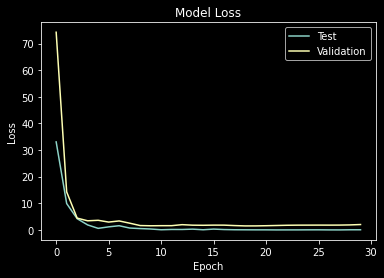

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [68]:
def names(number):
    if number==1:
        return 'a Tumor'
    else:
        return 'not a tumor'

99.99979734420776% Confidence This Is not a tumor


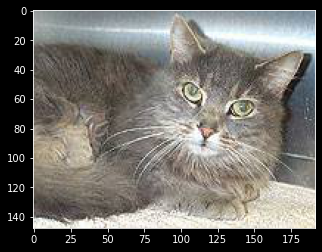

In [69]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\91902\Desktop\keras\7.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [74]:
model.save('CNN_Brain_tumor1.h5')

In [73]:
res

array([[9.9999797e-01, 2.0604884e-06]], dtype=float32)